<a href="https://colab.research.google.com/github/Thomas-D40/deep-learning/blob/main/A_la_d%C3%A9couverte_du_vrai_tensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import des données

import pandas as pd
import numpy as np

data_url = "https://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[0::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


# Scaling the data
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
data = s.fit_transform(data)
target = target.reshape((-1,1))


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=80718)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD # Stocastique Gradient Descent


model = Sequential([
    Dense(13, "sigmoid"),
    Dense(8, "sigmoid"),
    Dense(5, "sigmoid"),
    Dense(1)
    ])


In [ ]:
model.compile(SGD(learning_rate=0.01), "mse")

h = model.fit(X_train, y_train, epochs=1500, validation_data=(X_test, y_test))

Epoch 1/1500
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 396.0215 - val_loss: 115.7375
Epoch 2/1500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 97.3209 - val_loss: 91.6362
Epoch 3/1500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 87.4783 - val_loss: 92.0080
Epoch 4/1500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 87.0812 - val_loss: 90.8425
Epoch 5/1500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 89.4749 - val_loss: 90.2468
Epoch 6/1500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 90.0670 - val_loss: 89.7237
Epoch 7/1500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 81.6681 - val_loss: 89.1406
Epoch 8/1500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 80.5331 - val_loss: 88.5015
Epoch 9/1500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 64.4598 - val_loss: 87.4931
Epoch 10/1500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 82.6644 - val_loss: 85.5486
Epoch 11/1500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 79.7614 - val_loss: 82.3727
Epoch 12/1500
12/12 ━━━━━━

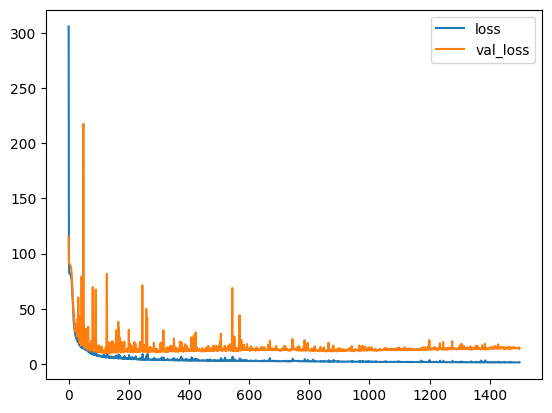

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h.history["loss"])
plt.plot(h.history["val_loss"])
plt.legend(["loss", "val_loss"])

In [ ]:
model.summary(
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 13)                  │             182 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 5)                   │              45 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 347 (1.36 KB)

 Trainable params: 345 (1.35 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model.save('model.keras')

In [ ]:
from tensorflow.keras.models import load_model
new_model = load_model('model.keras')

In [ ]:
new_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 13)                  │             182 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 5)                   │              45 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 347 (1.36 KB)

 Trainable params: 345 (1.35 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
new_model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


array([[41.584705],
       [14.06352 ],
       [17.341282],
       [12.129049],
       [19.765945],
       [22.17514 ],
       [15.565073],
       [22.744127],
       [34.197487],
       [14.583313],
       [35.50788 ],
       [18.636904],
       [14.411036],
       [39.43774 ],
       [17.439137],
       [25.1928  ],
       [15.419407],
       [28.135195],
       [24.68393 ],
       [24.135834],
       [22.90045 ],
       [24.906178],
       [16.55028 ],
       [25.683893],
       [20.716757],
       [24.053774],
       [26.546368],
       [36.02484 ],
       [36.034298],
       [17.406954],
       [12.866955],
       [13.041086],
       [33.418213],
       [20.166067],
       [22.168097],
       [42.19334 ],
       [40.585545],
       [23.347912],
       [26.795242],
       [28.889109],
       [38.977383],
       [21.402178],
       [41.233448],
       [19.043522],
       [35.71692 ],
       [30.049644],
       [20.568722],
       [19.708479],
       [12.823605],
       [23.212605],
